### World Happiness Report
Problem Statement:
Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
import pickle as pkl

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
display(df.head())

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.shape

(158, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
df.select_dtypes(exclude=['object']).columns

Index(['Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [6]:
numerical = ['Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']

In [7]:
df.select_dtypes(include=['object']).columns

Index(['Country', 'Region'], dtype='object')

In [8]:
categorical = ['Country', 'Region']

In [9]:
[i for i in df.columns if df[i].isnull().sum()>0]

[]

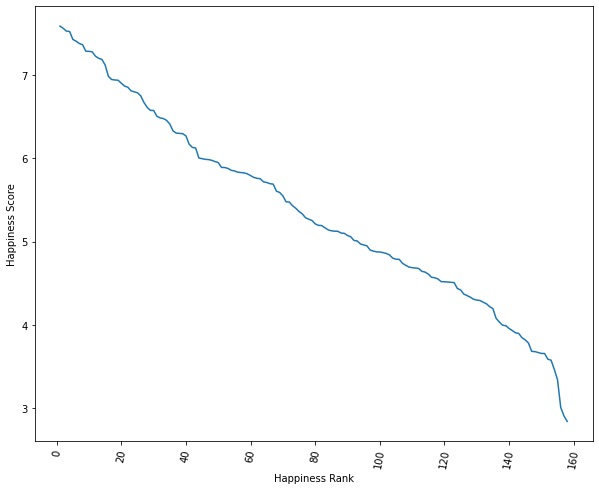

In [12]:
plt.figure(figsize=(10,8))
sns.lineplot(x="Happiness Rank", y="Happiness Score", data=df)
plt.xticks(rotation=80)
plt.show()

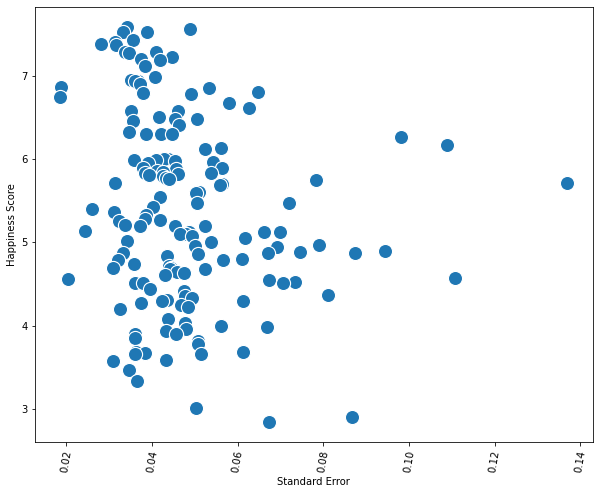

In [17]:
plt.figure(figsize=(10,8))
sns.scatterplot(y="Happiness Score", x="Standard Error", data=df,s=200)
plt.xticks(rotation=80)
plt.show()

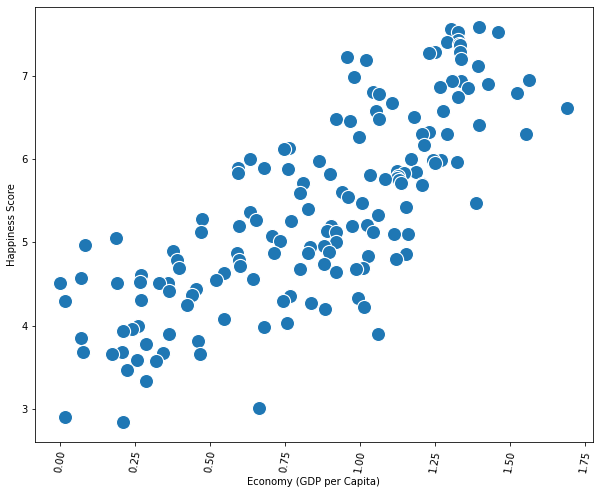

In [18]:
plt.figure(figsize=(10,8))
sns.scatterplot(y="Happiness Score", x="Economy (GDP per Capita)", data=df,s=200)
plt.xticks(rotation=80)
plt.show()

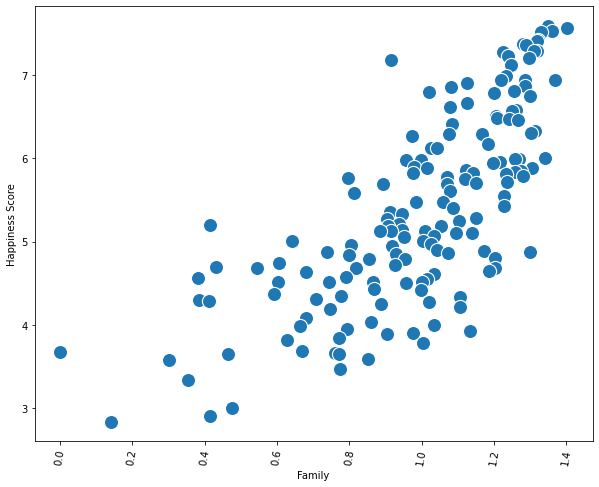

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(y="Happiness Score", x="Family", data=df,s=200)
plt.xticks(rotation=80)
plt.show()

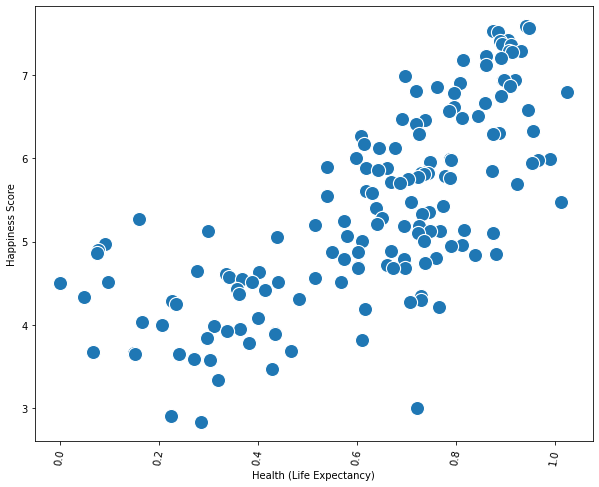

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(y="Happiness Score", x="Health (Life Expectancy)", data=df,s=200)
plt.xticks(rotation=80)
plt.show()

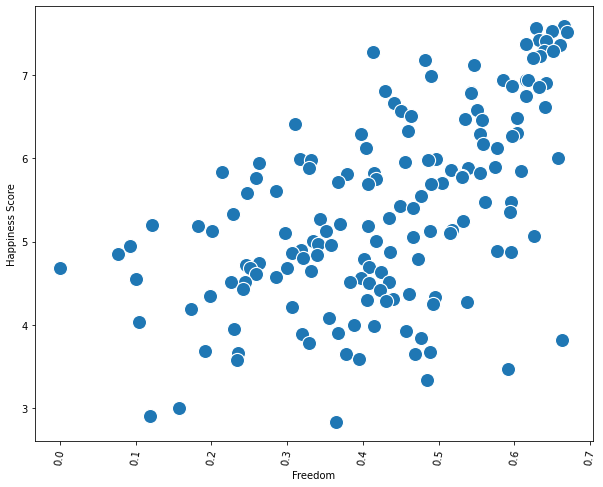

In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(y="Happiness Score", x="Freedom", data=df,s=200)
plt.xticks(rotation=80)
plt.show()

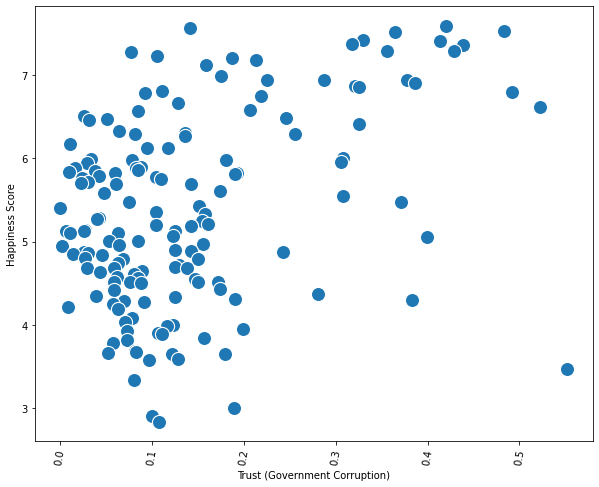

In [25]:
plt.figure(figsize=(10,8))
sns.scatterplot(y="Happiness Score", x="Trust (Government Corruption)", data=df,s=200)
plt.xticks(rotation=80)
plt.show()

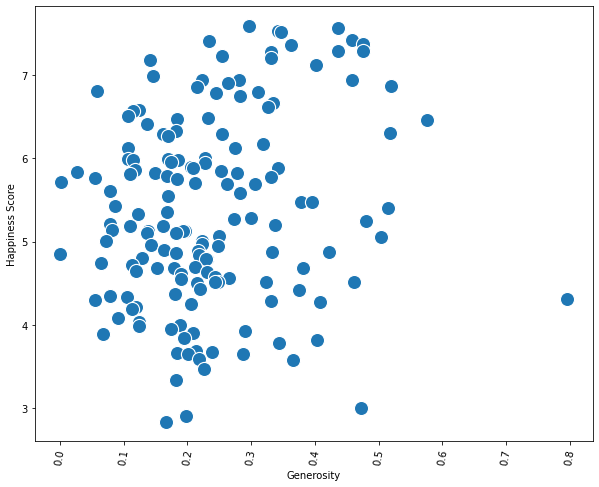

In [26]:
plt.figure(figsize=(10,8))
sns.scatterplot(y="Happiness Score", x="Generosity", data=df,s=200)
plt.xticks(rotation=80)
plt.show()

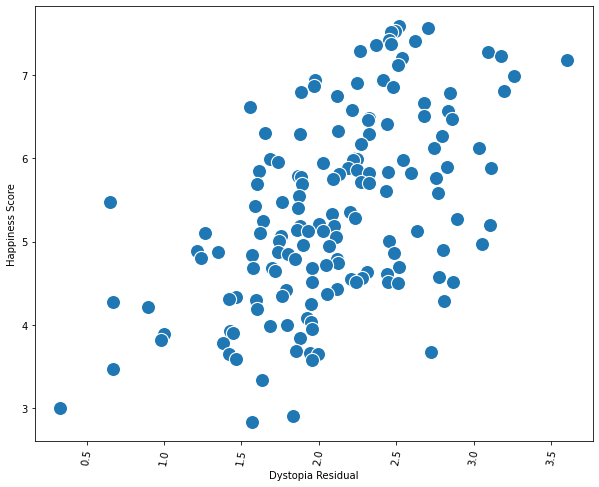

In [27]:
plt.figure(figsize=(10,8))
sns.scatterplot(y="Happiness Score", x="Dystopia Residual", data=df,s=200)
plt.xticks(rotation=80)
plt.show()

In [10]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [31]:
columns = ['Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']

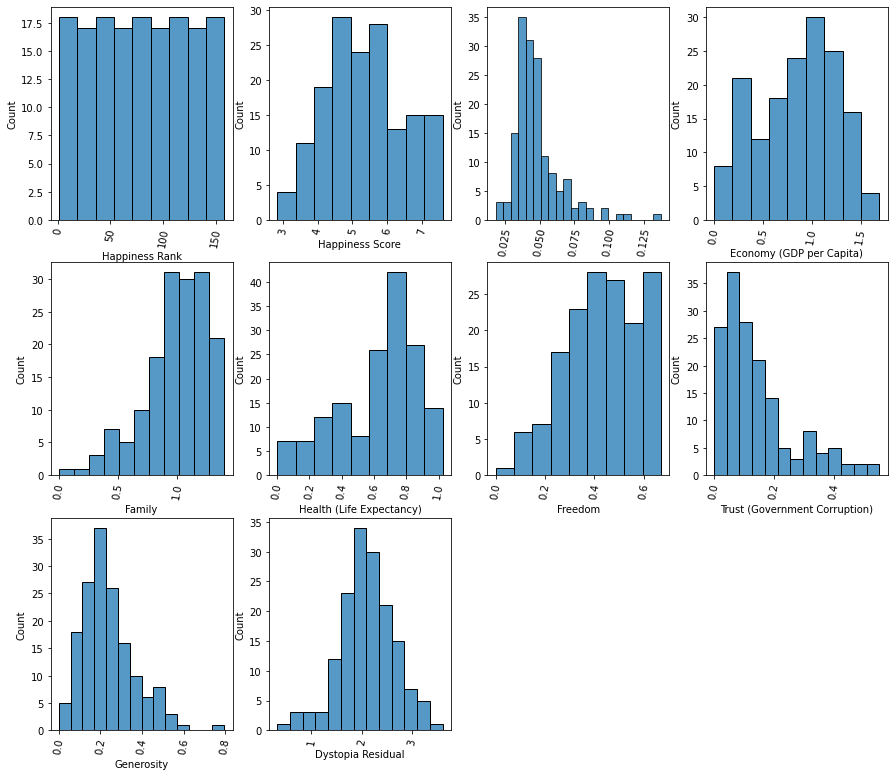

In [32]:
count=1
plt.subplots(figsize=(15,18))
for i in columns:
    plt.subplot(4,4,count)
    sns.histplot(df[i])
    plt.xticks(rotation=80)
    count+=1

plt.show()

In [34]:
categorical = ['Country', 'Region']

In [35]:
lab = LabelEncoder()
for i in categorical:
    df[i] = lab.fit_transform(df[i])

print(df.dtypes)

Country                          int32  
Region                           int32  
Happiness Rank                   int64  
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object


In [36]:
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


<AxesSubplot:>

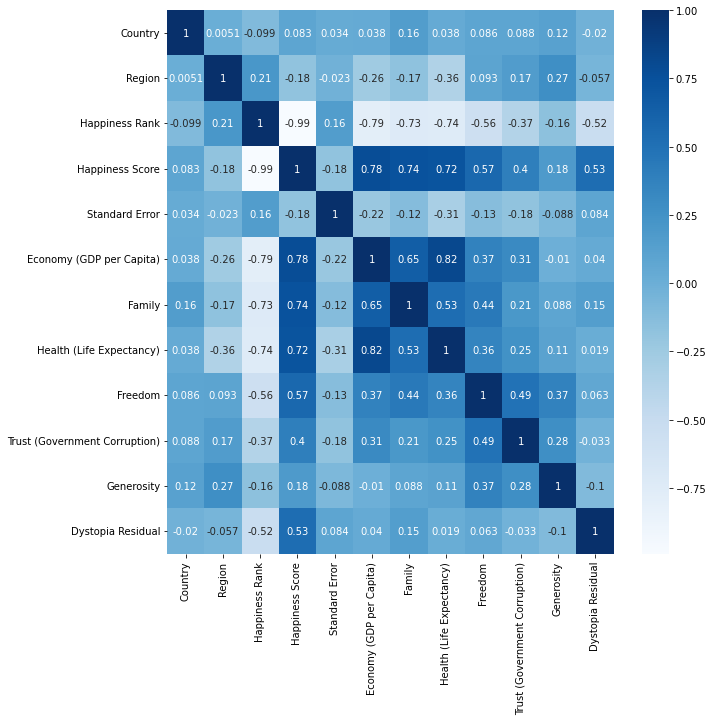

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [38]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [39]:
for i in columns :
    if df.skew().loc[i]>0.60:
        df[i] = np.log1p(df[i])

In [40]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.890608
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.180922
Generosity                       0.650767
Dystopia Residual               -0.238911
dtype: float64

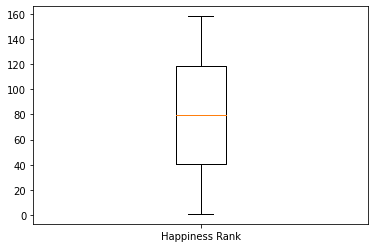

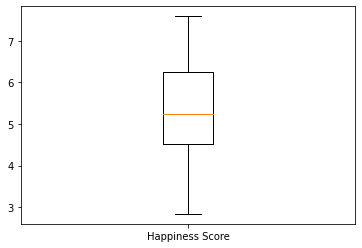

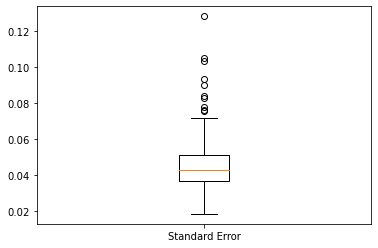

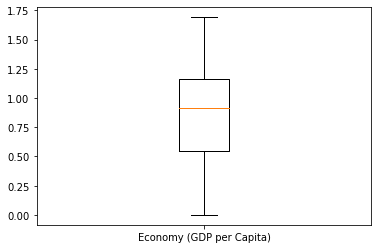

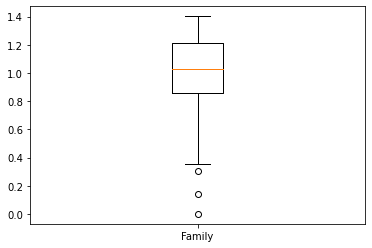

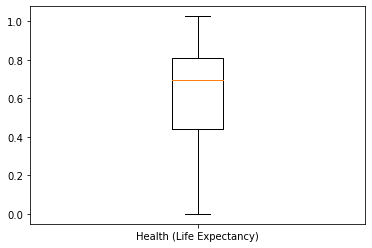

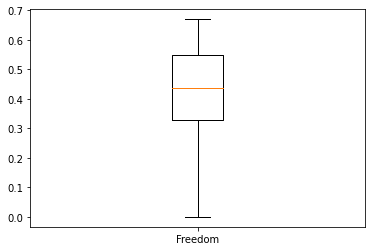

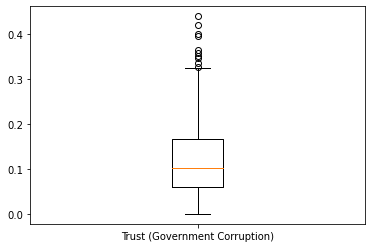

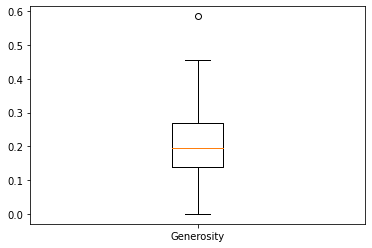

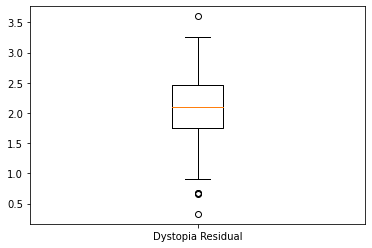

In [41]:
for i in columns:
    plt.boxplot(df[i], labels = [i])
    plt.show()

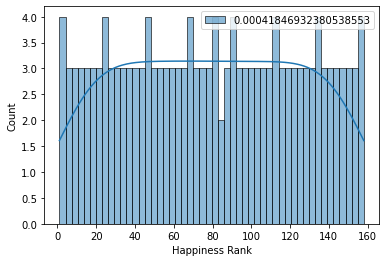

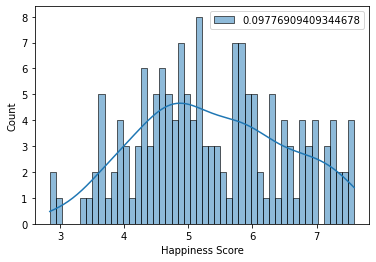

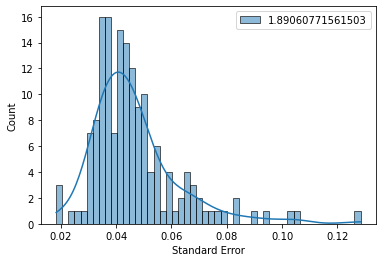

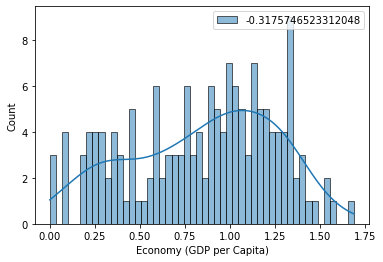

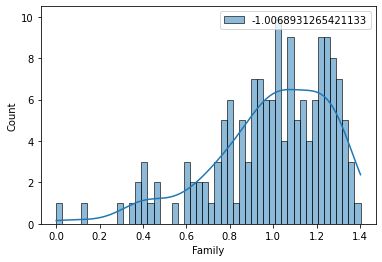

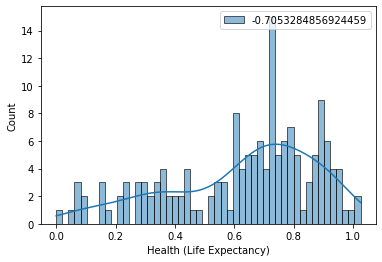

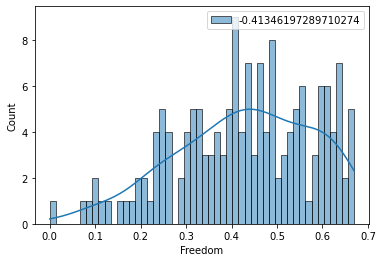

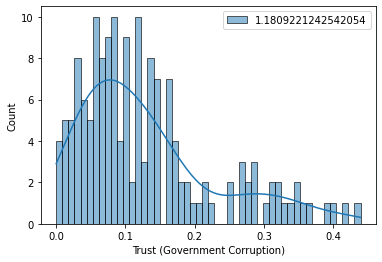

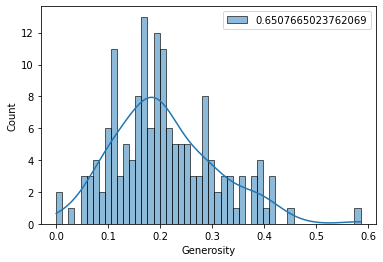

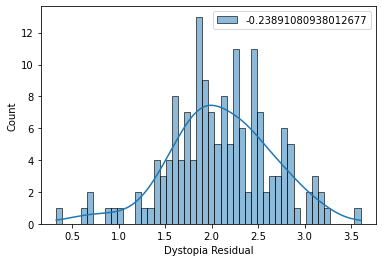

In [42]:
for i in columns:
    sns.histplot(df[i], kde = True, bins = 50, label = df[i].skew())
    plt.legend(loc = 'upper right')
    plt.show()

In [43]:
for i in columns:
    Q1,Q3 = np.percentile(df[i] , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    df_no_outliers = df[(df[i] < lower_range) | (df[i] > upper_range)]

In [44]:
df_no_outliers

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
13,91,3,14,7.187,0.040912,1.02054,0.91451,0.81444,0.48181,0.193196,0.131677,3.60214
71,56,2,72,5.474,0.049276,1.38604,1.05818,1.01328,0.59608,0.315715,0.332737,0.65429
131,130,7,132,4.271,0.036824,0.83524,1.01905,0.70806,0.53726,0.087819,0.342369,0.67108
153,118,8,154,3.465,0.034054,0.22208,0.77370,0.42864,0.59201,0.439486,0.203985,0.67042
155,136,4,156,3.006,0.048933,0.66320,0.47489,0.72193,0.15684,0.173163,0.386479,0.32858


In [45]:
z = np.abs(zscore(df))
threshold = 3
print(np.where(z<3))
print(df.shape)

(array([  0,   0,   0, ..., 157, 157, 157], dtype=int64), array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))
(158, 12)


In [46]:
df_new = df[(z<3).all(axis = 1)]
df_new.shape

(150, 12)

In [48]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [53]:
X = df_new.drop(['Happiness Score'],axis=1)
y = df_new['Happiness Score']

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
for i in X.columns:
    scaler = StandardScaler()
    X[i] = scaler.fit_transform(X[i].values.reshape(-1, 1))

In [56]:
reg_model = [LinearRegression(),GradientBoostingRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),ExtraTreesRegressor(),RandomForestRegressor()]
max_r2_score = 0
for r_state in range(42,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size = 0.33)
    for i in reg_model:
        i.fit(X_train,y_train)
        pred = i.predict(X_test)
        r2_scores = r2_score(y_test,pred)
        print("R2 score for the random state is" ,r_state ,"is", r2_scores)
        if r2_scores > max_r2_score:
            max_r2_score = r2_scores
            final_state = r_state
            final_model = i
print()
print()
print()
print()
print("Maximum R2 score in the random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score for the random state is 42 is 0.9999493855839201
R2 score for the random state is 42 is 0.9981015288408783
R2 score for the random state is 42 is 0.9969869428697936
R2 score for the random state is 42 is 0.9939429134408114
R2 score for the random state is 42 is 0.8824236466920855
R2 score for the random state is 42 is 0.998092376783916
R2 score for the random state is 42 is 0.9979562948918184
R2 score for the random state is 43 is 0.9998967078904699
R2 score for the random state is 43 is 0.9980431876319473
R2 score for the random state is 43 is 0.9947396366732967
R2 score for the random state is 43 is 0.9930312916257314
R2 score for the random state is 43 is 0.8917943207095271
R2 score for the random state is 43 is 0.9969840588330678
R2 score for the random state is 43 is 0.9971974205233337
R2 score for the random state is 44 is 0.9999029379383325
R2 score for the random state is 44 is 0.9940973438848966
R2 score for the random state is 44 is 0.9921980891744937
R2 score for th

In [57]:
LR = LinearRegression()
LR.fit(X_train,y_train)
pred = LR.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 99.98782955679447


In [58]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
print('Mean squared Error: ', mean_squared_error(y_test,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,pred)))

Mean Absolute Error:  0.00826019733220387
Mean squared Error:  0.00011665074625710963
Root Mean Absolute Error:  0.09088562775380864


Text(0, 0.5, 'Predicted_Y')

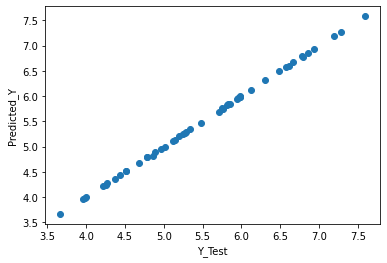

In [59]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

In [60]:
ETR = ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred = ETR.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 99.72246053713808


<AxesSubplot:>

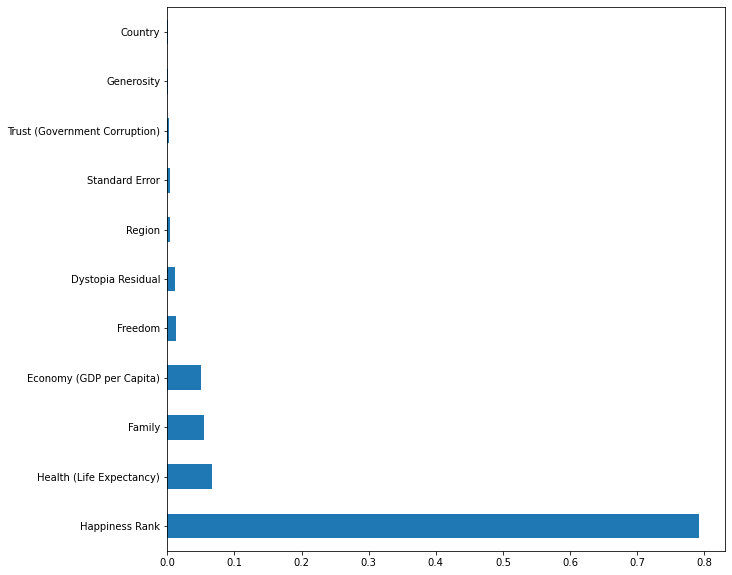

In [62]:
plt.figure(figsize=(10,10))
feat_importances = pd.Series(ETR.feature_importances_, index=X_train.columns)
feat_importances.nlargest(70).plot(kind='barh')

### Pipeline

### Pipeline with 3 features

In [63]:
from sklearn.pipeline import Pipeline,make_pipeline
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=3)),
                     ('lr_regressor',LinearRegression())])

In [64]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=3)),
                     ('rf_regressor',RandomForestRegressor())])

In [65]:
pipeline_gbr=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=3)),
                     ('rf_regressor',GradientBoostingRegressor())])

In [66]:
pipelines = [pipeline_lr, pipeline_dt,pipeline_gbr]

In [67]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [68]:
pipe_dict = {0: 'Linear Regression',1:'RandomForest',2:'GradientBoostingRegressor'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [69]:
pred = pipe.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 93.17864860165615
